In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df["PaymentMethod"].nunique()
df["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
df["Contract"].nunique()
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# Checking numerical and categorical data:

In [11]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['SeniorCitizen', 'tenure', 'MonthlyCharges']


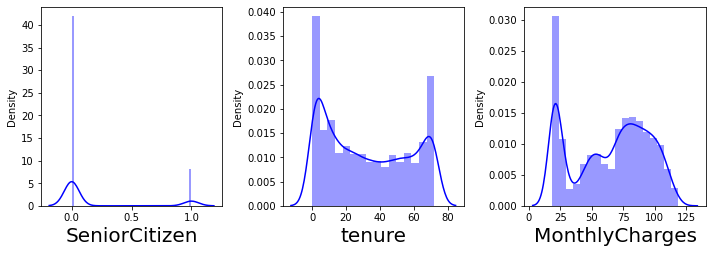

In [13]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

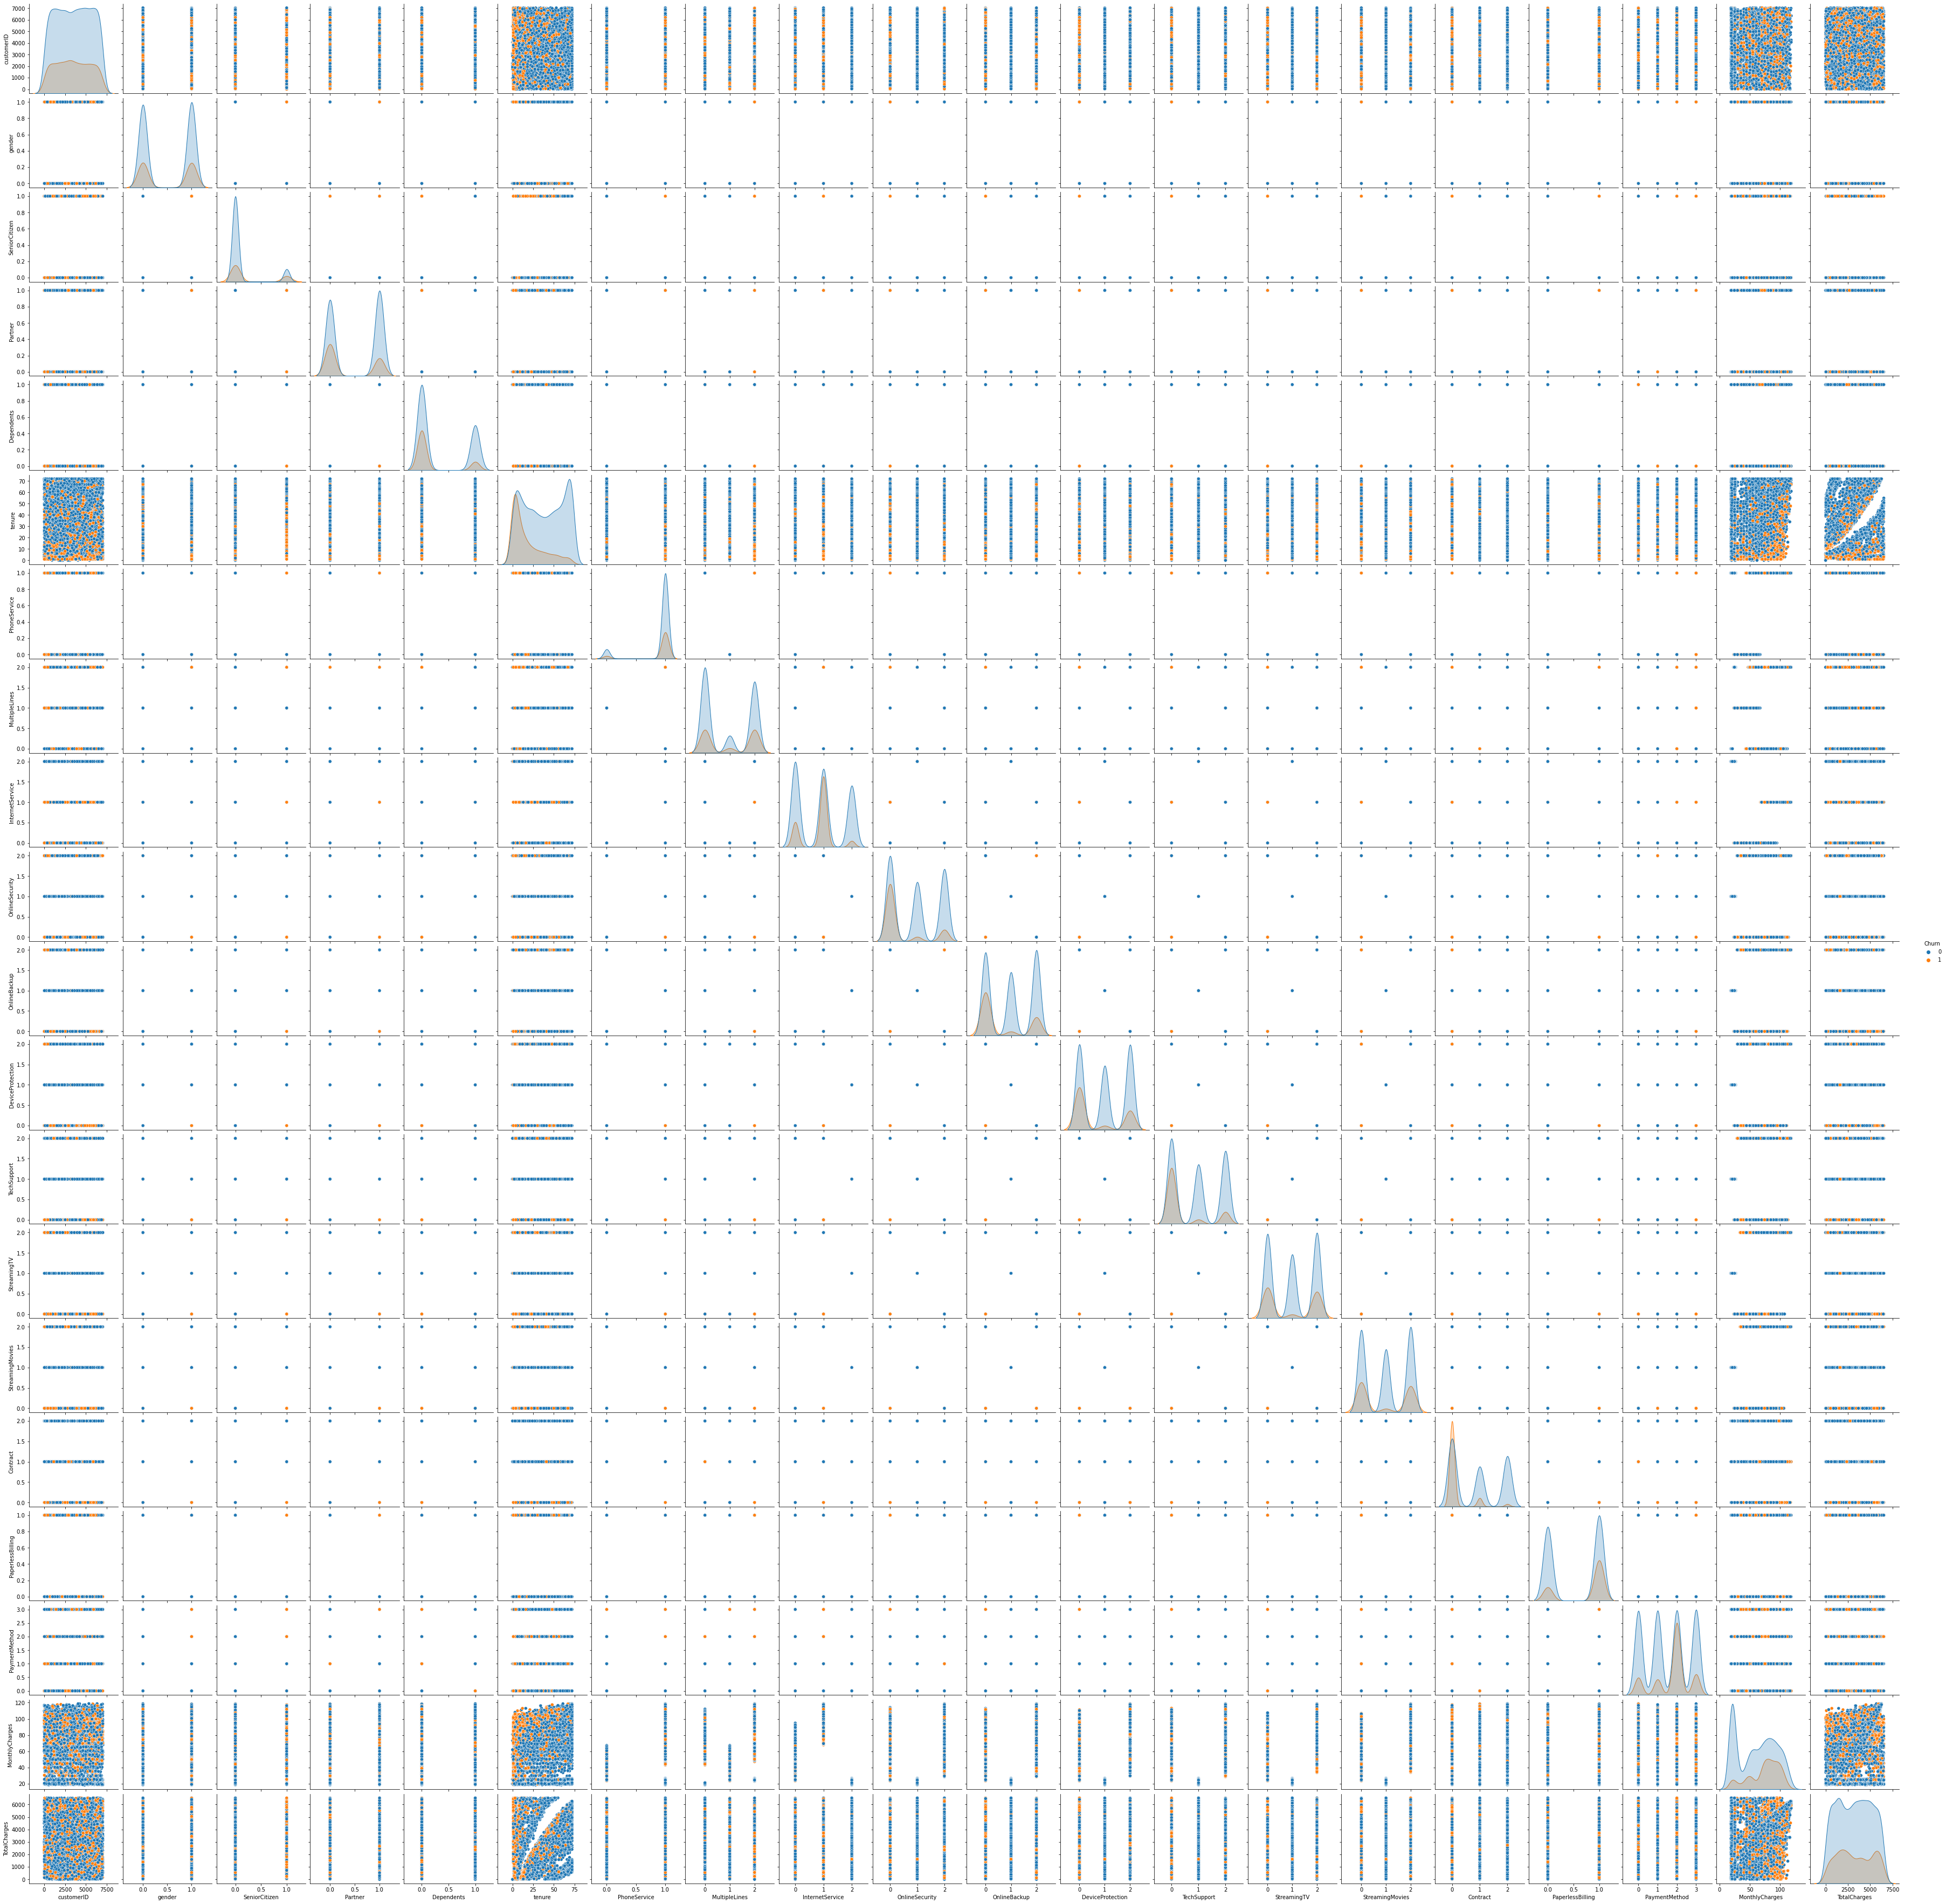

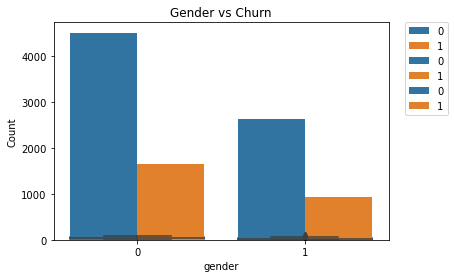

In [25]:
sns.pairplot(data = df, hue='Churn')
plt.show()

sns.boxplot(df['Churn'], df['tenure'])
counts = (df.groupby(['Contract'])['Churn']
  .value_counts()
  .rename('Count')
  .reset_index())

sns.barplot(x="Contract", y="Count", hue="Churn", data=counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
counts = (df.groupby(['SeniorCitizen'])['Churn']
  .value_counts()
  .rename('Count')
  .reset_index())

sns.barplot(x="SeniorCitizen", y="Count", hue="Churn", data=counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
counts = (df.groupby(['gender'])['Churn']
  .value_counts()
  .rename('Count')
  .reset_index())

sns.barplot(x="gender", y="Count", hue="Churn", data=counts).set_title('Gender vs Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Encoding techniques:

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 3:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

15 columns were label encoded.


In [17]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,Electronic check,70.70,151.65,1


# Data Visualizations:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [21]:
print(cat_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [22]:
le=LabelEncoder()
df[cat_col]= df[cat_col].apply(le.fit_transform)

In [23]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


# Outlier:

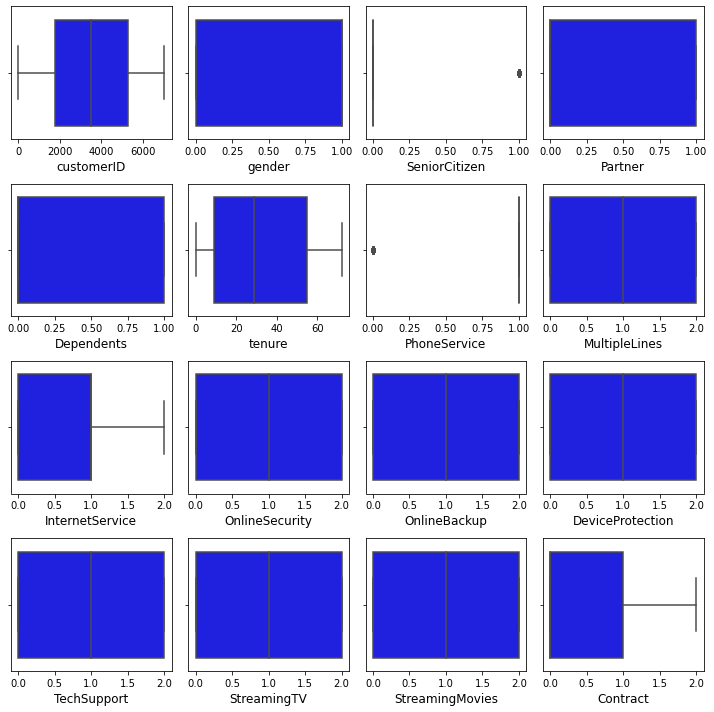

In [24]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# STANDARDIZATION TECHNIQUES:

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,1.009559,0.439916,1.034530,0.654012,1.277445,3.054010,0.062723,1.183234,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.160323,0.398608,0.601023
1,0.216906,0.990532,0.439916,0.966622,0.654012,0.066327,0.327438,0.991588,1.183234,1.407321,...,1.245111,0.925262,1.113495,1.121405,0.371271,1.205113,1.334863,0.259629,0.948762,0.601023
2,0.470701,0.990532,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.362660,1.641883,1.663829
3,0.990587,0.990532,0.439916,0.966622,0.654012,0.514251,3.054010,0.062723,1.183234,1.407321,...,1.245111,1.396299,1.113495,1.121405,0.371271,1.205113,1.474052,0.746535,0.983710,0.601023
4,1.470632,1.009559,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,0.197365,1.235224,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,0.439916,1.034530,1.529024,0.340876,0.327438,1.117034,1.183234,1.407321,...,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.879397,0.601023
7039,0.981733,1.009559,0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,0.918838,...,1.245111,0.925262,1.146547,1.138411,0.371271,0.829798,0.537747,1.277533,1.292099,0.601023
7040,0.075745,1.009559,0.439916,1.034530,1.529024,0.870241,3.054010,0.062723,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.168632,0.139680,0.601023
7041,1.186835,0.990532,2.273159,1.034530,0.654012,1.155283,0.327438,1.117034,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.320338,0.316534,1.663829


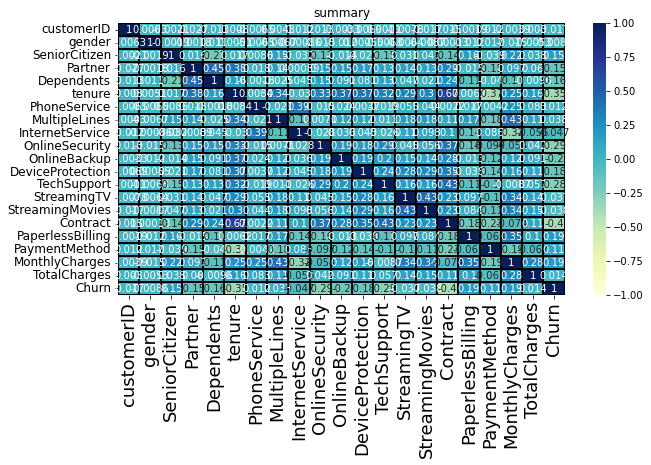

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",cmap="YlGnBu")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('summary')
plt.savefig('heatmap.png')
plt.show()

# Standardization Techniques:

In [30]:
x=df.drop('Churn', axis=1)
y=df['Churn']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.879397
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.292099
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.139680
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.316534


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.002435,customerID
1,1.001719,gender
2,1.149739,SeniorCitizen
3,1.461981,Partner
4,1.382218,Dependents
5,2.754763,tenure
6,1.622292,PhoneService
7,1.392868,MultipleLines
8,1.826783,InternetService
9,1.248006,OnlineSecurity


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [53]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.3028269661007005 Random_State 63


In [40]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

In [41]:
LR = LinearRegression()
rf=RandomForestRegressor()
knn=KNN()
gb=GradientBoostingRegressor()
br=BaggingRegressor()

In [42]:
LR.fit(x_train,y_train)

predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

print('MAE:',metrics.mean_absolute_error(y_test, predLR))

print('MSE:',metrics.mean_squared_error(y_test, predLR))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.28818256173703005
MAE: 0.30866872506764187
MSE: 0.14129820930135442
RMSE: 0.37589654068819844


In [45]:
rf.fit(x_train,y_train)

predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

print('MAE:',metrics.mean_absolute_error(y_test, predrf))

print('MSE:',metrics.mean_squared_error(y_test, predrf))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.29813210989402805
MAE: 0.27003786086133463
MSE: 0.13932318977756744
RMSE: 0.3732602172447091


In [46]:
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_score: 0.17165303653957242
MAE: 0.28471367723615715
MSE: 0.16442972077614768
RMSE: 0.4054993474423204


In [47]:
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_score:',r2_score(y_test,predgb))

print('MAE:',metrics.mean_absolute_error(y_test, predgb))

print('MSE:',metrics.mean_squared_error(y_test, predgb))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb))) 

R2_score: 0.3322835756135172
MAE: 0.26892371005225835
MSE: 0.132544006391788
RMSE: 0.36406593687378663


In [48]:
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_score:',r2_score(y_test,predbr))

print('MAE:',metrics.mean_absolute_error(y_test, predbr))

print('MSE:',metrics.mean_squared_error(y_test, predbr))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_score: 0.2471588744764588
MAE: 0.26857548509228585
MSE: 0.14944155229531472
RMSE: 0.3865767094579221


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

0.8088026502602934
[[1408  128]
 [ 276  301]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1536
           1       0.70      0.52      0.60       577

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [56]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.8035967818267865
[[1414  122]
 [ 293  284]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1536
           1       0.70      0.49      0.58       577

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.738760056791292
[[1258  278]
 [ 274  303]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1536
           1       0.52      0.53      0.52       577

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



In [60]:
svc = SVC()
svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7983909133932797
[[1423  113]
 [ 313  264]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1536
           1       0.70      0.46      0.55       577

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



In [62]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8012304779933743
[[1413  123]
 [ 297  280]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1536
           1       0.69      0.49      0.57       577

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



# CROSS-VALIDATION

In [63]:
print(cross_val_score(LR,x,y,cv=5).mean())

print(cross_val_score(rf,x,y,cv=5).mean())

print(cross_val_score(knn,x,y,cv=5).mean())

print(cross_val_score(gb,x,y,cv=5).mean())

print(cross_val_score(br,x,y,cv=5).mean())

0.26492744698626497
0.7939814665462288
0.12544192305149054
0.30327597494179737
0.21963137148547007


In [65]:
print(cross_val_score(rf,x,y,cv=5).mean())

print(cross_val_score(log,x,y,cv=5).mean())

print(cross_val_score(dtc,x,y,cv=5).mean())

print(cross_val_score(svc,x,y,cv=5).mean())

print(cross_val_score(GB,x,y,cv=5).mean())

0.7905734845796504
0.8030680406800439
0.7282415397767599
0.7956860120007743
0.8013635960384541


# HYPERPARAMETER TUNNING FOR THE MODEL WITH BEST SCORE

In [85]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.logspace(-4, 4, 50)
grid = dict(solver=solvers,penalty=penalty,C=c_values, max_iter = [1000])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.804192 using {'C': 0.02811768697974228, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
